<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

## 1 Differential Equations and Euler

### 1.2 What do we mean by changes?

In [ ]:

# Your code here


### 1.3 Calculus: Meaning and Notation

In [ ]:

# Your code here


### 1.4 Calculus: Getting a feel for \(\dfrac{dN}{dt}\)

In [ ]:

# Your code here


### 1.5 Solving Differential Equations

In [ ]:

# Your code here


### 1.6 The Euler Method

In [ ]:

# Your code here


### 1.7 Using Euler for the logistic equation

In [ ]:

# Your code here


### 1.8 Some things to note about the code

In [ ]:

# Your code here


## 2 Coupled Differential Equations: Predator-Prey Model

### 2.1 The equations

In [ ]:

# Your code here


### 2.2 Example code

In [ ]:

# Your code here


### 2.3 Some things to note about the code

In [ ]:

# Your code here


## 3 Hello SciPy

### 3.1 SciPy odeint()

In [ ]:

# Your code here


### 3.2 Radioactivity

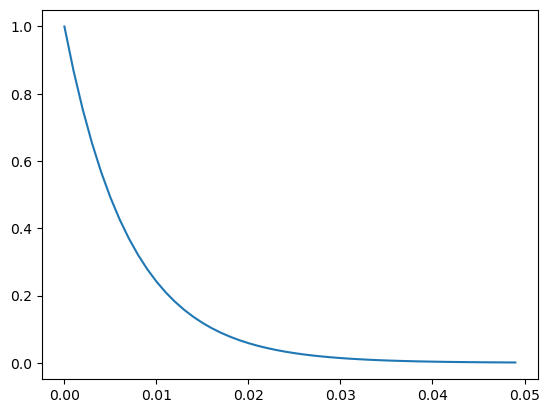

In [6]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

max_time = 0.05
dt = .001
decay_constant = 142       # For 85 Rb (per Myr)
N0 = 1                     # Starting value of N (in billions of atoms)

def dNdt(N, time, decay_constant):
    '''
    Function for the derivative.
    '''
    return - decay_constant*N


all_time = np.arange(0, max_time, dt)

all_N = odeint(y0=[N0],                  # Initial values
               func=dNdt,                # Function for the drivative
               t=all_time,               # Time span
               args=(decay_constant,)    # Any arguments to dNdt
               )

plt.plot(all_time, all_N)
plt.show()

### 3.3 Logistic Equation

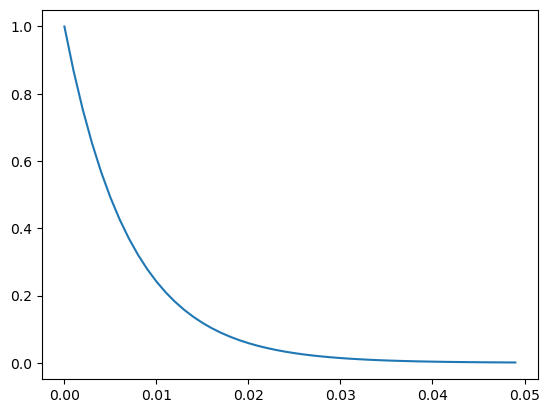

In [5]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def dNdt(N, time, rate, carrying_capacity):
    '''
    Function for the derivative.
    '''
    return rate*N*(1-N/carrying_capacity)


max_time, dt = 3, .1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))

plt.plot(all_time, all_N)
plt.show()

### 3.4 Predator-Prey

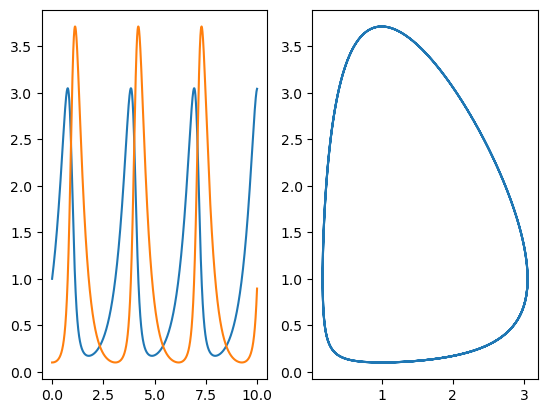

In [10]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1

# Lotka-Volterra equations
def dy_dt(y, t):
    '''
    Function for the derivative.
    - y contains all the variables for the simulation 
    - t is the dependant variable
    '''

    rabbits, foxes = y

    # Rabbits
    a, b = 2, 2
    drabbits_dt = a*rabbits - b*rabbits*foxes

    # Foxes
    d, g = 3, 3
    dfoxes_dt = d*foxes*rabbits - g*foxes

    return [drabbits_dt, dfoxes_dt]


data = {}
data['time'] = np.arange(0, max_time, dt)

# Note the order I pass the rabbit and fox information
results = odeint(y0=[rabbits0, foxes0],          # Dependant variable
                 func=dy_dt,                     # Derivatives
                 t=data['time']                  # Independant variable
                 )
# Extract the individual results (Note, the order matters)
data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(data['time'], data['rabbits'])
ax[0].plot(data['time'], data['foxes'])

ax[1].plot(data["rabbits"], data["foxes"])

plt.show()

## Exercise 1 :  The Lorentz Attaractor

<IPython.core.display.Javascript object>


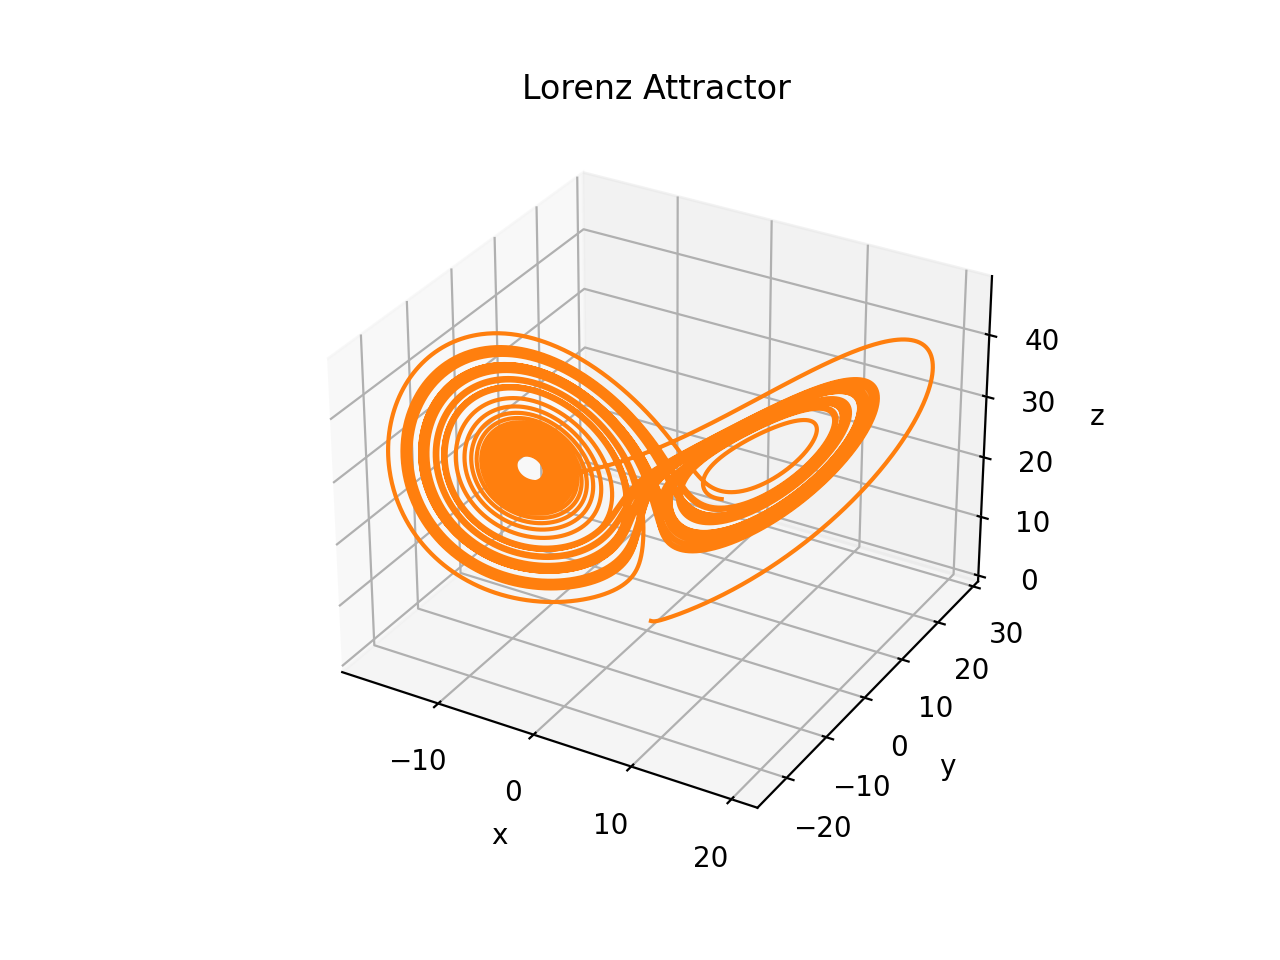

In [45]:
%matplotlib nbagg

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.integrate as spin

max_time = 50
current_time = 0
dt = 0.001
init_x, init_y, init_z = 0, 1, 0

#constants for the mathy-wathy shit
sigma = 10
beta = 8/3
rho = 28

def dxyz_dt(xyz, t):
    x, y, z = xyz
    
    dx_dt = sigma*(y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x*y - beta*z
    
    return [dx_dt, dy_dt, dz_dt]

data = {}

data["time"] = np.arange(0, max_time, dt)
results = spin.odeint(y0=[init_x, init_y, init_z], 
                      func=dxyz_dt, 
                      t=data["time"])
data["x"] = results[:, 0]
data["y"] = results[:, 1]
data["z"] = results[:, 2]

fig = plt.figure()
ax = plt.axes(projection='3d')
lines = ax.plot3D([], [], [])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Lorenz Attractor")

def animate(t):
    for line in lines:
        line.set_data(data["x"][:t], data["y"][:t])
        line.set_3d_properties(data["z"][:t])
    return lines

#anim = FuncAnimation(fig, animate, frames=200, interval=10, blit=True)
ax.plot3D(data["x"], data["y"], data["z"])
plt.show()